[Text(267.84000000000003, 362.4, 'Vlažnost oka <= 1.5\nentropy = 1.392\nsamples = 9\nvalue = [4, 4, 1]'),
 Text(133.92000000000002, 217.44, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(401.76000000000005, 217.44, 'Astigmatizam <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(267.84000000000003, 72.47999999999996, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(535.6800000000001, 72.47999999999996, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

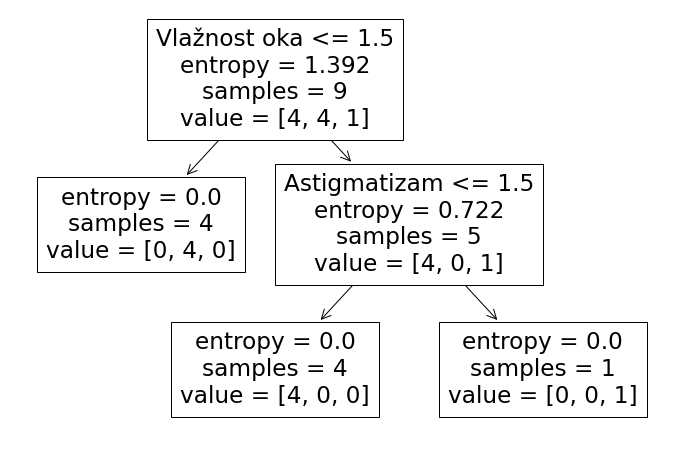

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

df = pd.read_csv('DM_vjezba.csv')
# print(df.head())

# X DATASET BEZ ZADNJE KOLONE KOJA TREBA DA SE PREDVIDI
X = df.drop(['Sočiva'], axis=1)
# Y KOLONA SOCIVA
y=df['Sočiva']

# DIJELJENJE VRIJEDNOSTI U TEST I TRENING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 1)

# STRING VRIJEDNOSTI KONVERTOVATI U 0,1,2...
encoder = ce.OrdinalEncoder(cols=['Starost', 'Dijagnoza', 'Astigmatizam', 'Vlažnost oka'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# print(X_test.head())

# OBJEKAT ZA TRENING(criterion:entropy ili gini, default gini)
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3, random_state=0, splitter='best')

y_pred_en = clf_en.predict(X_test)

plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), feature_names=X_train.columns)